In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

u1 = [2, 8, 3, 4, 5]
u2 = [2, 8, 4, 9, 5]
u3 = [8, 8, 4, 9, 5]
covariance = [[2, 1, 0, 1, 0],
              [1, 2, 0, 1, 0],
              [0, 0, 2, 0, 0],
              [1, 1, 0, 2, 0],
              [0, 0, 0, 0, 2]]
#Creating 3 vectors of 100, 5 dimensions
data1 = np.random.multivariate_normal(u1, covariance, 100)
data2 = np.random.multivariate_normal(u2, covariance, 100)
data3 = np.random.multivariate_normal(u3, covariance, 100)

class1_sample = np.array(data1).reshape(100, 5)
class2_sample = np.array(data2).reshape(100, 5)
class3_sample = np.array(data3).reshape(100, 5)

#Creating X_train
X = []
X.append(class1_sample)
X.append(class2_sample)
X.append(class3_sample)
X_train = np.array(X).reshape(300, 5)

#Creating Y_train
y =[]
for i in range(100):
    y.append(1)
for i in range(100):
    y.append(2)
for i in range(100):
    y.append(3)
Y_train = np.array(y).reshape(300, 1)

#Creating X_test
test1 = np.random.multivariate_normal(u1, covariance, 40)
test2 = np.random.multivariate_normal(u2, covariance, 40)
test3 = np.random.multivariate_normal(u3, covariance, 40)
class1_test = np.array(test1).reshape(40, 5)
class2_test = np.array(test2).reshape(40, 5)
class3_test = np.array(test3).reshape(40, 5)
XX = []
XX.append(class1_test)
XX.append(class2_test)
XX.append(class3_test)
X_test = np.array(XX).reshape(120, 5)

#Creating T_test
yy =[]
for i in range(40):
    yy.append(1)
for i in range(40):
    yy.append(2)
for i in range(40):
    yy.append(3)
Y_test = np.array(yy).reshape(120, 1)

Populating the interactive namespace from numpy and matplotlib


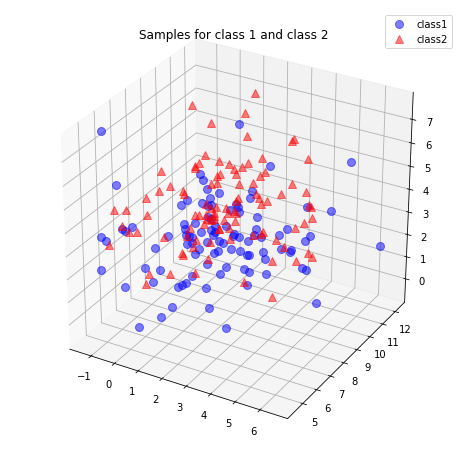

In [2]:
#Plot the data for any three dimension (Optional)
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   

ax.plot(class1_sample[:,0], class1_sample[:, 1], class1_sample[:, 2], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[:, 0], class2_sample[:, 1], class2_sample[:, 2], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

#Decision Tree

In [3]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9666666666666667


#KNN

C:\Users\Maurya\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


Text(0,0.5,'Testing Accuracy')

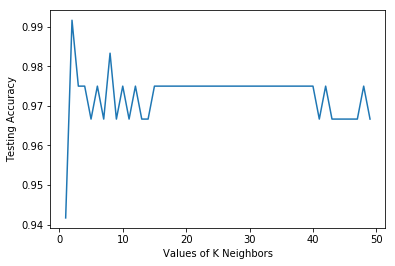

In [4]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1, 50)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(Y_test, y_pred)
    scores_list.append(metrics.accuracy_score(Y_test, y_pred))
#Plot graph between K and Accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Values of K Neighbors')
plt.ylabel('Testing Accuracy')

#PCA 5D to 2D

In [5]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [6]:
#Computing the mean vector
mean = np.mean(X_train_std, axis = 0)
mean1 = np.mean(X_test_std, axis = 0)

print('Mean Vector:\n', mean)
print('Mean Vector Test:\n', mean1)



Mean Vector:
 [-3.58972111e-16  5.35127498e-16 -1.40702265e-15  6.13583258e-16
 -1.07969189e-16]
Mean Vector Test:
 [-4.58892184e-16 -1.55986335e-15 -2.61827597e-16  7.88258347e-16
  1.45300438e-15]


In [7]:
#3.Computing the Covariance Matrix 
cov_mat = ((X_train_std - mean).T.dot(X_train_std-mean))/(X_train_std.shape[0]-1)
cov_mat1 = ((X_test_std - mean1).T.dot(X_test_std-mean1))/(X_test_std.shape[0]-1)

print('Covariance Matrix:\n', cov_mat)
print('Covariance Matrix X_test:\n', cov_mat1)



Covariance Matrix:
 [[ 1.00334448  0.34588218  0.14054186  0.53293234 -0.08168493]
 [ 0.34588218  1.00334448  0.05987861  0.3476886  -0.12904471]
 [ 0.14054186  0.05987861  1.00334448  0.35380103 -0.03564842]
 [ 0.53293234  0.3476886   0.35380103  1.00334448 -0.06973361]
 [-0.08168493 -0.12904471 -0.03564842 -0.06973361  1.00334448]]
Covariance Matrix X_test:
 [[ 1.00840336  0.080157    0.15870965  0.45923923 -0.00971216]
 [ 0.080157    1.00840336  0.02021382  0.25764602  0.02497146]
 [ 0.15870965  0.02021382  1.00840336  0.33624308  0.12748531]
 [ 0.45923923  0.25764602  0.33624308  1.00840336 -0.0617152 ]
 [-0.00971216  0.02497146  0.12748531 -0.0617152   1.00840336]]


In [8]:
#4. Compute eigenvectors and corresponding eigenvalues

eig_val, eig_vec = np.linalg.eig(cov_mat)
print("Eigenvalues :\n", eig_val )
print("Eigenvectors :\n", eig_vec )
eig_val1, eig_vec1 = np.linalg.eig(cov_mat1)
print("Eigenvalues X_test:\n", eig_val1 )
print("Eigenvectors X_test:\n", eig_vec1 )


Eigenvalues :
 [1.97357226 0.4192745  0.6603658  0.93718173 1.02632812]
Eigenvectors :
 [[-0.55070617 -0.56556837 -0.54651833  0.27574016 -0.04626239]
 [-0.45219149 -0.08928565  0.74346276  0.32735696 -0.35728346]
 [-0.331306   -0.31471934  0.30405701 -0.6083813   0.5732448 ]
 [-0.59696851  0.75653452 -0.18910676  0.01615523  0.18778115]
 [ 0.16158744 -0.02770835  0.14271931  0.66814369  0.71157358]]
Eigenvalues X_test:
 [1.73250077 0.45271861 0.79290702 0.978857   1.0850334 ]
Eigenvectors X_test:
 [[ 0.54180377  0.47562024  0.63415503  0.24119312 -0.14109335]
 [ 0.30477026  0.27175185 -0.17596979 -0.87358354 -0.19786979]
 [ 0.43407959  0.34297621 -0.6300974   0.27904326  0.46803243]
 [ 0.65157981 -0.74496466 -0.04042964  0.03384829 -0.13300807]
 [ 0.02413331 -0.16532182  0.4101521  -0.31570054  0.8391631 ]]


In [9]:
# Make a list/data frame of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:, i]) for i in range(len(eig_val))]
eig_pairs1 = [(np.abs(eig_val1[i]), eig_vec1[:, i]) for i in range(len(eig_val1))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()
eig_pairs1.sort()
eig_pairs1.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])
print("For X_test:")
for i in eig_pairs1:
    print(i[0])

1.9735722603416828
1.0263281172569318
0.9371817285880473
0.660365802808666
0.41927449903142777
For X_test:
1.7325007738289917
1.0850334039741019
0.978856995266583
0.7929070220782991
0.4527186115747137


In [10]:
#6 Choosing k=2 eigenvectors with the largest eigenvalues

matrix_w = np.hstack((eig_pairs[0][1].reshape(5, 1),
                     eig_pairs[1][1].reshape(5, 1)))
print('Matrix W:\n', matrix_w)

matrix_w1 = np.hstack((eig_pairs1[0][1].reshape(5, 1),
                     eig_pairs1[1][1].reshape(5, 1)))
print('Test Matrix W:\n', matrix_w1)

Matrix W:
 [[-0.55070617 -0.04626239]
 [-0.45219149 -0.35728346]
 [-0.331306    0.5732448 ]
 [-0.59696851  0.18778115]
 [ 0.16158744  0.71157358]]
Test Matrix W:
 [[ 0.54180377 -0.14109335]
 [ 0.30477026 -0.19786979]
 [ 0.43407959  0.46803243]
 [ 0.65157981 -0.13300807]
 [ 0.02413331  0.8391631 ]]


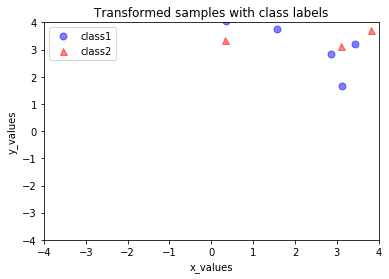

In [11]:
#7 Transforming the samples onto the new subspace

transform = X_train.dot(matrix_w)
transformed = np.array(transform).reshape(2, 300)
change = X_test.dot(matrix_w1)
changed = np.array(change).reshape(2, 120)

plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

#Decision Tree

In [12]:
#1 Classify the data using decision tree
x_train = transformed.reshape(300, 2)
x_test = changed.reshape(120, 2)
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(x_train,Y_train)

#Predict the response for test dataset
y_pred1 = clf1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred1))

Accuracy: 0.35


#KNN

C:\Users\Maurya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Text(0,0.5,'Testing Accuracy')

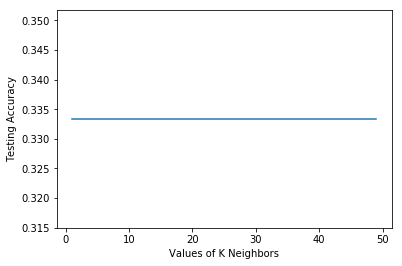

In [13]:
#1 Classify the data using KNN
#KNN Classifier
l_range = range(1, 50)
score = {}
score_list = []
for l in l_range:
    knn = KNeighborsClassifier(n_neighbors = l)
    knn.fit(x_train, Y_train)
    y_pred1 = knn.predict(x_test)
    score[l] = metrics.accuracy_score(Y_test, y_pred1)
    score_list.append(metrics.accuracy_score(Y_test, y_pred1))
#Plot graph between K and Accuracy
plt.plot(l_range, score_list)
plt.xlabel('Values of K Neighbors')
plt.ylabel('Testing Accuracy')